In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load iris dataset
iris = pd.read_csv('gan_axis2_demo.csv')
X = iris.drop['class']  # we only take the first four features.
y = iris.classe

# Normalize the data
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

# Convert data to pandas DataFrame
real_data = pd.DataFrame(X)
real_labels = y

# One hot encode labels
one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_labels = one_hot_encoder.fit_transform(np.array(real_labels).reshape(-1, 1))

# Constants
NOISE_DIM = 100
NUM_CLASSES = 3
NUM_FEATURES = 4
BATCH_SIZE = 64
TRAINING_STEPS = 500

# Generator
def create_generator():
    noise_input = Input(shape=(NOISE_DIM,))
    class_input = Input(shape=(NUM_CLASSES,))
    merged_input = Concatenate()([noise_input, class_input])
    hidden = Dense(128, activation='relu')(merged_input)
    output = Dense(NUM_FEATURES, activation='linear')(hidden)
    model = Model(inputs=[noise_input, class_input], outputs=output)
    return model

# Discriminator
def create_discriminator():
    data_input = Input(shape=(NUM_FEATURES,))
    class_input = Input(shape=(NUM_CLASSES,))
    merged_input = Concatenate()([data_input, class_input])
    hidden = Dense(128, activation='relu')(merged_input)
    output = Dense(1, activation='sigmoid')(hidden)
    model = Model(inputs=[data_input, class_input], outputs=output)
    return model

# cGAN
def create_cgan(generator, discriminator):
    noise_input = Input(shape=(NOISE_DIM,))
    class_input = Input(shape=(NUM_CLASSES,))
    generated_data = generator([noise_input, class_input])
    validity = discriminator([generated_data, class_input])
    model = Model(inputs=[noise_input, class_input], outputs=validity)
    return model

# Create and compile the Discriminator
discriminator = create_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam())

# Create the Generator
generator = create_generator()

# Create the GAN
gan = create_cgan(generator, discriminator)

# Ensure that only the generator is trained
discriminator.trainable = False

gan.compile(loss='binary_crossentropy', optimizer=Adam())

# Train GAN
for step in range(TRAINING_STEPS):
    # Select a random batch of real data with labels
    idx = np.random.randint(0, real_data.shape[0], BATCH_SIZE)
    real_batch = real_data.iloc[idx].values
    labels_batch = one_hot_labels[idx]

    # Generate a batch of new data
    noise = np.random.normal(0, 1, (BATCH_SIZE, NOISE_DIM))
    generated_batch = generator.predict([noise, labels_batch])

    # Train the discriminator
    real_loss = discriminator.train_on_batch([real_batch, labels_batch], np.ones((BATCH_SIZE, 1)))
    fake_loss = discriminator.train_on_batch([generated_batch, labels_batch], np.zeros((BATCH_SIZE, 1)))
    discriminator_loss = 0.5 * np.add(real_loss, fake_loss)

    # Train the generator
    generator_loss = gan.train_on_batch([noise, labels_batch], np.ones((BATCH_SIZE, 1)))

    if step % 100 == 0:
        print(f"Step: {step}, Discriminator Loss: {discriminator_loss}, Generator Loss: {generator_loss}")

# Generate instances for a given class
def generate_data(generator, data_class, num_instances):
    one_hot_class = one_hot_encoder.transform(np.array([[data_class]]))
    noise = np.random.normal(0, 1, (num_instances, NOISE_DIM))
    generated_data = generator.predict([noise, np.repeat(one_hot_class, num_instances, axis=0)])
    return pd.DataFrame(generated_data)

# Generate 40 instances of class 1
generated_data = generate_data(generator, 1, 40)
print(generated_data)

AttributeError: 'DataFrame' object has no attribute 'data'

In [1]:

# One hot encode labels
one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_labels = one_hot_encoder.fit_transform(np.array(real_labels).reshape(-1, 1))

# Constants
NOISE_DIM = 100
NUM_CLASSES = 3
NUM_FEATURES = 4
BATCH_SIZE = 64
TRAINING_STEPS = 500

# Generator
def create_generator():
    noise_input = Input(shape=(NOISE_DIM,))
    class_input = Input(shape=(NUM_CLASSES,))
    merged_input = Concatenate()([noise_input, class_input])
    hidden = Dense(128, activation='relu')(merged_input)
    output = Dense(NUM_FEATURES, activation='linear')(hidden)
    model = Model(inputs=[noise_input, class_input], outputs=output)
    return model

# Discriminator
def create_discriminator():
    data_input = Input(shape=(NUM_FEATURES,))
    class_input = Input(shape=(NUM_CLASSES,))
    merged_input = Concatenate()([data_input, class_input])
    hidden = Dense(128, activation='relu')(merged_input)
    output = Dense(1, activation='sigmoid')(hidden)
    model = Model(inputs=[data_input, class_input], outputs=output)
    return model

# cGAN
def create_cgan(generator, discriminator):
    noise_input = Input(shape=(NOISE_DIM,))
    class_input = Input(shape=(NUM_CLASSES,))
    generated_data = generator([noise_input, class_input])
    validity = discriminator([generated_data, class_input])
    model = Model(inputs=[noise_input, class_input], outputs=validity)
    return model

# Create and compile the Discriminator
discriminator = create_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam())

# Create the Generator
generator = create_generator()

# Create the GAN
gan = create_cgan(generator, discriminator)

# Ensure that only the generator is trained
discriminator.trainable = False

gan.compile(loss='binary_crossentropy', optimizer=Adam())

# Train GAN
for step in range(TRAINING_STEPS):
    # Select a random batch of real data with labels
    idx = np.random.randint(0, real_data.shape[0], BATCH_SIZE)
    real_batch = real_data.iloc[idx].values
    labels_batch = one_hot_labels[idx]

    # Generate a batch of new data
    noise = np.random.normal(0, 1, (BATCH_SIZE, NOISE_DIM))
    generated_batch = generator.predict([noise, labels_batch])

    # Train the discriminator
    real_loss = discriminator.train_on_batch([real_batch, labels_batch], np.ones((BATCH_SIZE, 1)))
    fake_loss = discriminator.train_on_batch([generated_batch, labels_batch], np.zeros((BATCH_SIZE, 1)))
    discriminator_loss = 0.5 * np.add(real_loss, fake_loss)

    # Train the generator
    generator_loss = gan.train_on_batch([noise, labels_batch], np.ones((BATCH_SIZE, 1)))

    if step % 100 == 0:
        print(f"Step: {step}, Discriminator Loss: {discriminator_loss}, Generator Loss: {generator_loss}")

# Generate instances for a given class
def generate_data(generator, data_class, num_instances):
    one_hot_class = one_hot_encoder.transform(np.array([[data_class]]))
    noise = np.random.normal(0, 1, (num_instances, NOISE_DIM))
    generated_data = generator.predict([noise, np.repeat(one_hot_class, num_instances, axis=0)])
    return pd.DataFrame(generated_data, columns=['a', 'b', 'c', 'd'])

# Generate 40 instances of class 1
generated_data = generate_data(generator, 1, 40)
print(generated_data)

NameError: name 'OneHotEncoder' is not defined

In [4]:
# Generate 50 instances for each class
synthetic_data_class_0 = generate_data(generator, 0, 50)
synthetic_data_class_1 = generate_data(generator, 1, 50)
synthetic_data_class_2 = generate_data(generator, 2, 50)

# Combine all synthetic data into a single DataFrame and apply inverse transform to bring it back to original scale
synthetic_data = pd.concat([synthetic_data_class_0, synthetic_data_class_1, synthetic_data_class_2], ignore_index=True)
synthetic_data = pd.DataFrame(scaler.inverse_transform(synthetic_data), columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])

# Create corresponding class labels
synthetic_labels = [0]*50 + [1]*50 + [2]*50

# Add labels to the synthetic data
synthetic_data['class'] = synthetic_labels

# Save synthetic data as a CSV file
synthetic_data.to_csv(r'D:\studydata\Masterarbeit\Data\gan\synthetic_iris_data.csv', index=False)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


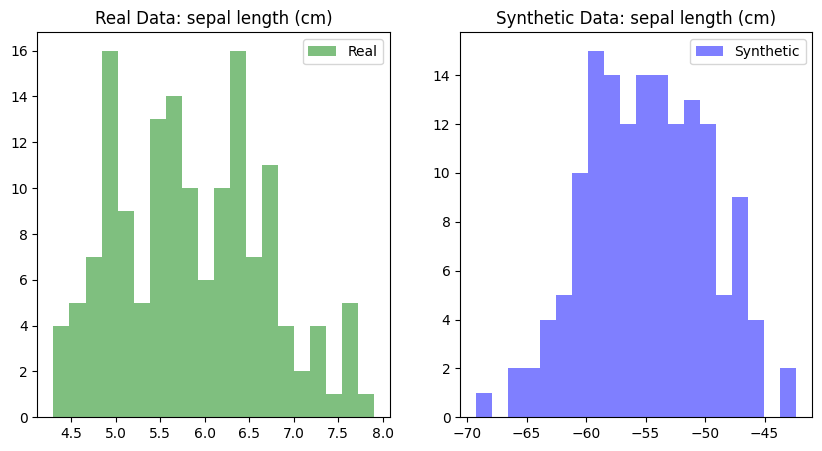

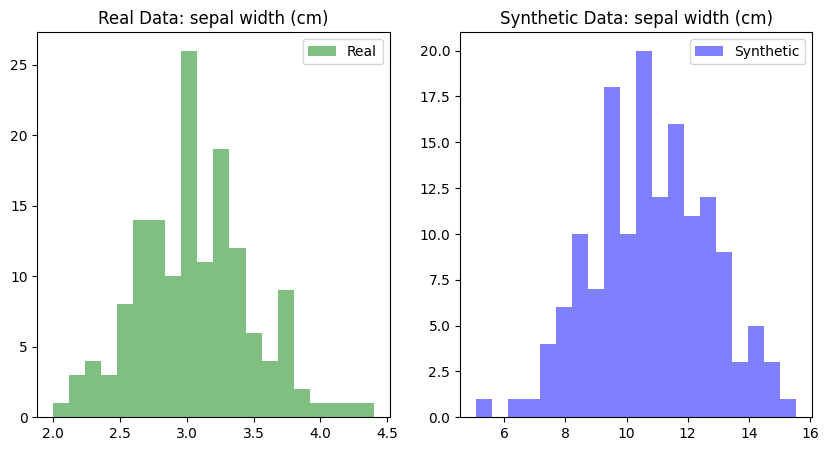

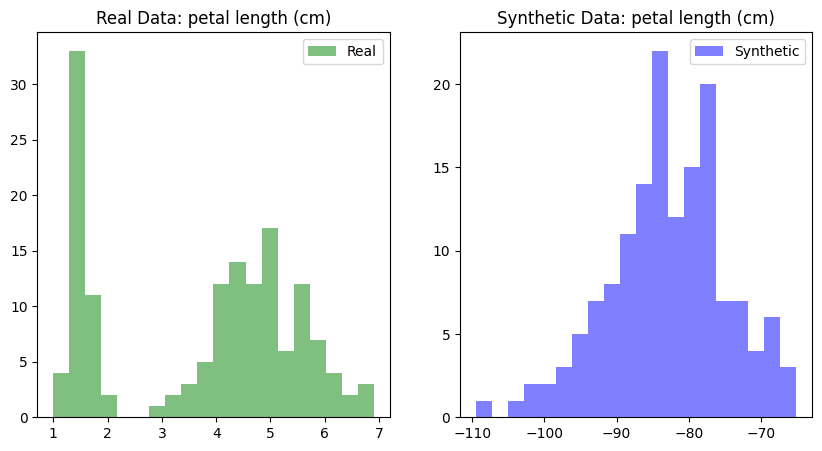

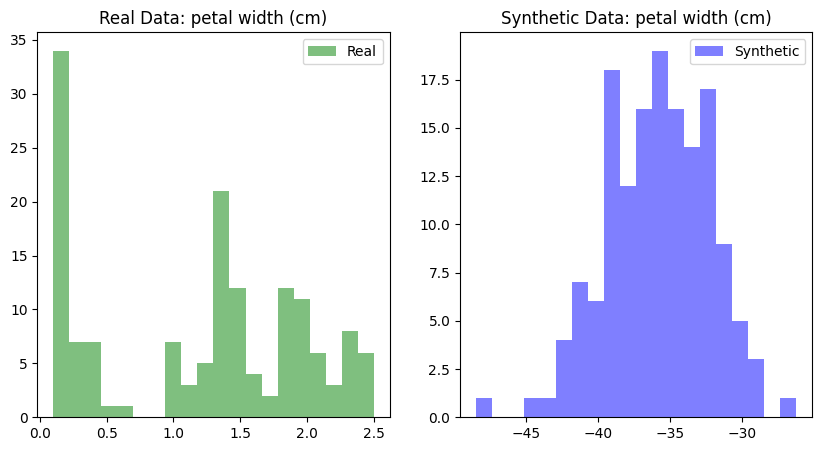

Summary statistics for the real data:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)       class  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  

Summary statistics for the synthe

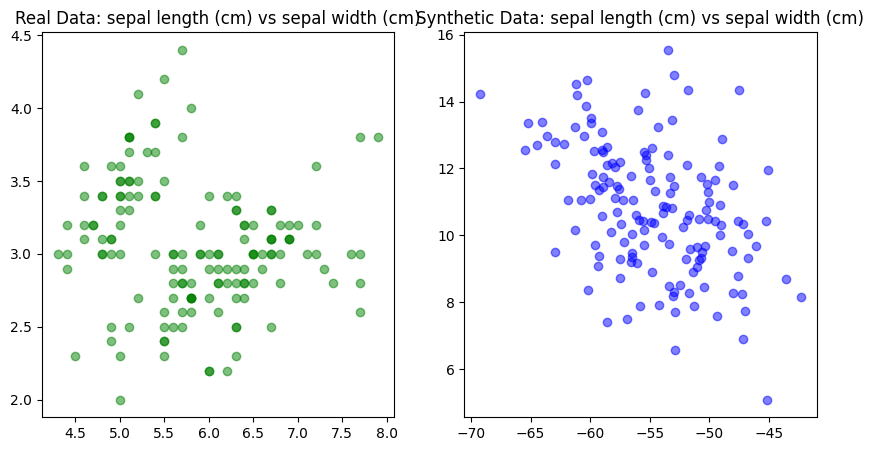

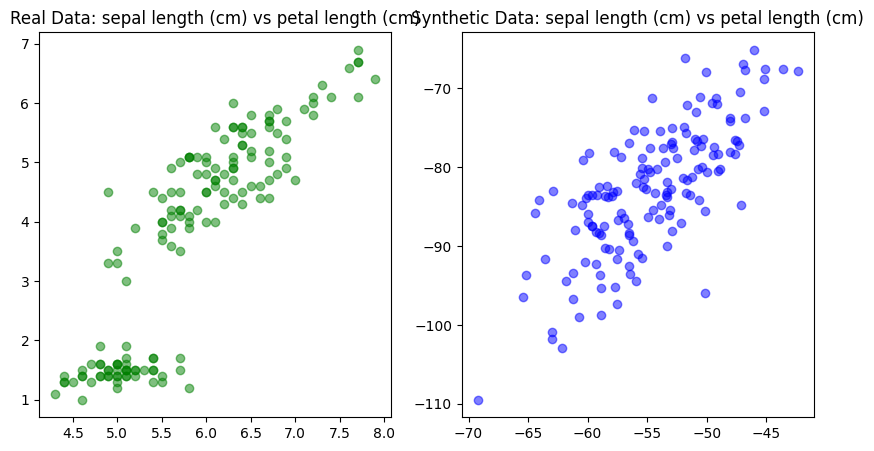

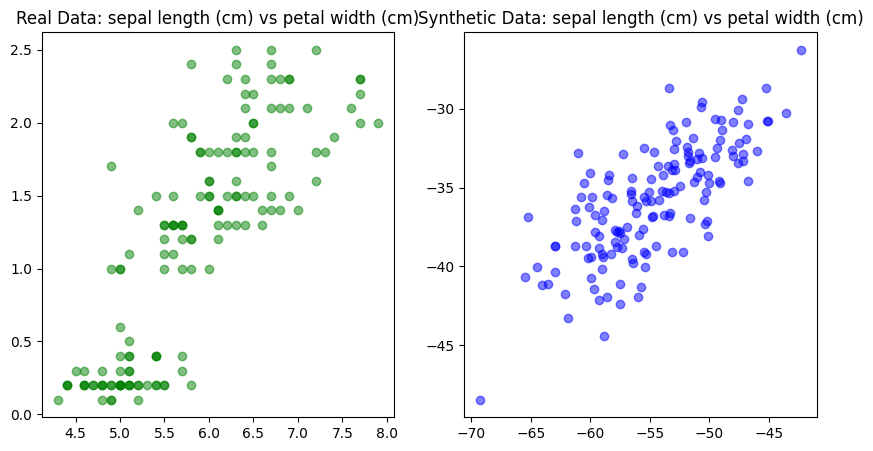

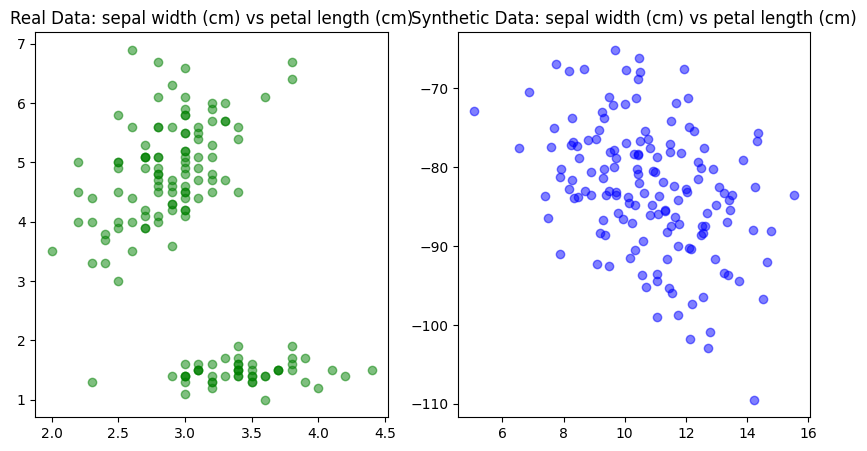

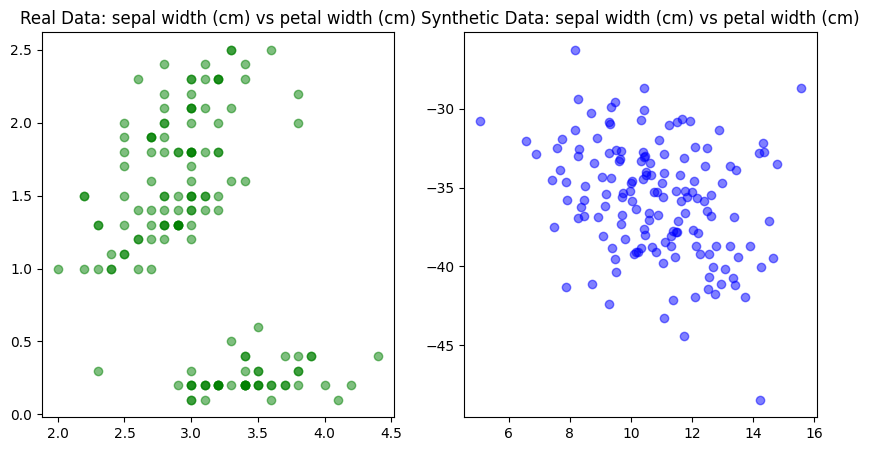

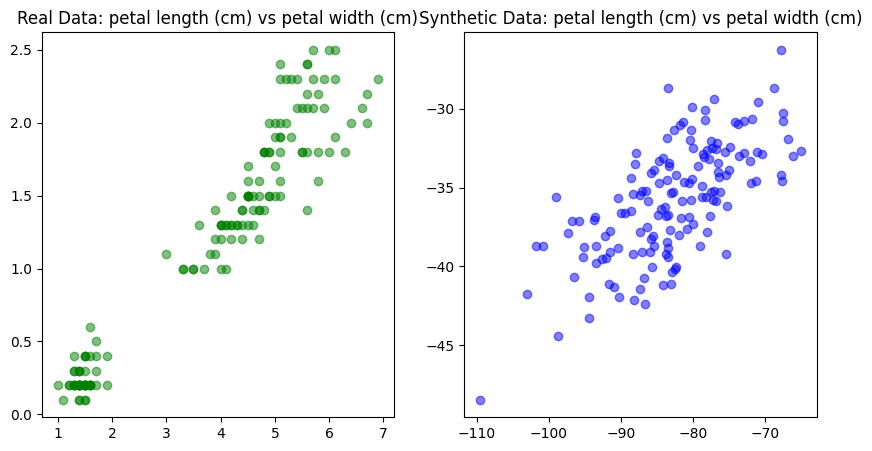

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

# Load the Iris dataset from sklearn
iris = datasets.load_iris()
real_data = pd.DataFrame(iris.data, columns=iris.feature_names)
real_data['class'] = iris.target

# Load the synthetic dataset
synthetic_data = pd.read_csv(r'D:\studydata\Masterarbeit\Data\gan\synthetic_iris_data.csv')

# For each feature, create a histogram for the real and synthetic data
for feature in ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']:
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.hist(real_data[feature], bins=20, alpha=0.5, color='g', label='Real')
    plt.title(f"Real Data: {feature}")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.hist(synthetic_data[feature], bins=20, alpha=0.5, color='b', label='Synthetic')
    plt.title(f"Synthetic Data: {feature}")
    plt.legend()

    plt.show()

# Print the summary statistics for the real and synthetic data
print("Summary statistics for the real data:")
print(real_data.describe())
print("\nSummary statistics for the synthetic data:")
print(synthetic_data.describe())

# For each pair of features, create a scatter plot for the real and synthetic data
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
for i in range(len(features)):
    for j in range(i+1, len(features)):
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.scatter(real_data[features[i]], real_data[features[j]], alpha=0.5, color='g')
        plt.title(f"Real Data: {features[i]} vs {features[j]}")

        plt.subplot(1, 2, 2)
        plt.scatter(synthetic_data[features[i]], synthetic_data[features[j]], alpha=0.5, color='b')
        plt.title(f"Synthetic Data: {features[i]} vs {features[j]}")

        plt.show()

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the synthetic dataset
synthetic_data = pd.read_csv(r'C:\Users\lia68085\test\synthetic_iris_data.csv')

# Separate the features and the target variable
X = synthetic_data.drop(columns=['class'])
y = synthetic_data['class']

# Split the dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred = knn.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [11]:
from sklearn.metrics import accuracy_score

# Load the real Iris data from sklearn
iris = datasets.load_iris()
real_data = pd.DataFrame(iris.data, columns=iris.feature_names)
real_labels = iris.target

# Standardize the real data
real_data = scaler.transform(real_data)

# Use the trained KNN model to make predictions on the real data
real_pred = knn.predict(real_data)

# Calculate the accuracy of the model on the real data
accuracy = accuracy_score(real_labels, real_pred)
print("Accuracy of the model on the real data: ", accuracy)

Accuracy of the model on the real data:  0.9066666666666666


In [12]:
# Split the real data into training and testing datasets
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(real_data, real_labels, test_size=0.2, random_state=42)

# Standardize the feature values
scaler_real = StandardScaler()
X_train_real = scaler_real.fit_transform(X_train_real)
X_test_real = scaler_real.transform(X_test_real)

# Train a K-Nearest Neighbors model on the real data
knn_real = KNeighborsClassifier(n_neighbors=3)
knn_real.fit(X_train_real, y_train_real)

# Make predictions on the test dataset
y_pred_real = knn_real.predict(X_test_real)

# Evaluate the model
accuracy_real = accuracy_score(y_test_real, y_pred_real)
print("Accuracy of the model trained on real data: ", accuracy_real)

Accuracy of the model trained on real data:  1.0


In [13]:
# Make predictions on the real test data with the model trained on synthetic data
y_pred_synthetic_model = knn.predict(X_test_real)

# Evaluate the model trained on synthetic data
accuracy_synthetic_model = accuracy_score(y_test_real, y_pred_synthetic_model)
print("Accuracy of the model trained on synthetic data: ", accuracy_synthetic_model)

# Make predictions on the real test data with the model trained on real data
y_pred_real_model = knn_real.predict(X_test_real)

# Evaluate the model trained on real data
accuracy_real_model = accuracy_score(y_test_real, y_pred_real_model)
print("Accuracy of the model trained on real data: ", accuracy_real_model)

Accuracy of the model trained on synthetic data:  0.9666666666666667
Accuracy of the model trained on real data:  1.0
